## Genetik Algoritma ile Güneş Paneli Optimizasyonu

Ad: Mustafa  
Soyad: Yıldız  
Okul Numarası: 2212729001  
GitHub Repo: https://github.com/mustafasdg/Genetik-Algoritma-ile-Gunes-Paneli-Optimizasyonu


### Problem Tanımı

Bu projede, bir belediyeye ait güneş panellerinin
eğim açısı ve yön sapması optimize edilmiştir.
Amaç, verilen kısıtlar altında enerji verimini
maksimize etmektir.

Optimizasyon problemi genetik algoritma kullanılarak çözülmüştür.


### Senaryonun Modellenmesi

Bu çalışmada güneş paneli yerleşimi gerçek hayattaki
fiziksel sınırlamalar dikkate alınarak modellenmiştir.

Eğim açısı ve yön sapması, panel kurulumlarında
karşılaşılan temel parametrelerdir.
Toplam eğim ve yön kombinasyonu belirli bir sınırı
aşamayacağı için kısıt fonksiyonu tanımlanmıştır.

Bu sayede genetik algoritma, gerçekçi ve uygulanabilir
çözümler üretmektedir.


### Amaç Fonksiyonu

y = 6x₁ + 4x₂ − 0.1x₁²

x₁: Eğim açısı (10° – 45°)  
x₂: Güney yönüne göre sapma (0° – 90°)

### Kısıtlar
- x₁ + 0.5x₂ ≤ 60  
- x₂ ≥ 15



In [540]:
import random
import matplotlib.pyplot as plt


### Uygunluk (Fitness) Fonksiyonu

Fitness fonksiyonu, her bireyin enerji verimini
hesaplamak için kullanılmaktadır.
Genetik algoritma bu değeri maksimize etmeye çalışır.


In [541]:
def fitness(birey):
    x1, x2 = birey
    return 6*x1 + 4*x2 - 0.1*(x1**2)



Amaç fonksiyonu, eğim açısı ve yön sapmasının
enerji verimine olan etkisini temsil eden
basitleştirilmiş bir matematiksel modeldir.


In [542]:
def birey_uret():
    while True:
        x1 = random.uniform(10, 45)
        x2 = random.uniform(0, 90)
        if x1 + 0.5*x2 <= 60 and x2 >= 15:
            return [x1, x2]


Kısıtlar, panel kurulumunda fiziksel sınırların
aşılmaması için tanımlanmıştır.
Genetik algoritma, yalnızca bu kısıtları sağlayan
bireyleri kabul etmektedir.


### Birey ve Popülasyon Yapısı

Her birey, [x₁, x₂] şeklinde iki genli
bir çözümü temsil etmektedir.
Popülasyon, bu bireylerin bir araya gelmesiyle
oluşturulmuştur.


In [543]:
def populasyon_olustur(boyut):
    return [birey_uret() for _ in range(boyut)]


### Rulet Tekeri Seçim Mekanizması

Bu adımda, popülasyondaki her bireyin seçilme olasılığı uygunluk (fitness) değeri ile orantılı olarak belirlenir. Uygunluk değeri yüksek olan bireyler rulet tekerinde daha geniş bir dilime sahip olurken, düşük uygunluk değerine sahip bireylerin seçilme olasılığı daha düşüktür.


In [544]:
def turnuva_secimi(populasyon, k=3):
    adaylar = random.sample(populasyon, k)
    return max(adaylar, key=fitness)


Rulet seçimi, yüksek uygunluk değerine sahip
bireylerin seçilmesini sağlarken,
popülasyondaki çeşitliliği de korur.


### Çaprazlama İşlemi

Çaprazlama, ebeveyn bireylerin genlerini
birleştirerek yeni çözümler üretir.
Bu sayede genetik çeşitlilik sağlanır.


In [545]:
def caprazlama(ebeveyn1, ebeveyn2):
    alpha = random.random()
    x1 = alpha*ebeveyn1[0] + (1-alpha)*ebeveyn2[0]
    x2 = alpha*ebeveyn1[1] + (1-alpha)*ebeveyn2[1]

    if x1 + 0.5*x2 <= 60 and x2 >= 15:
        return [x1, x2]
    return ebeveyn1

### Mutasyon İşlemi

Mutasyon işlemi, bireylerin genlerinde küçük
rastgele değişiklikler yaparak algoritmanın
yerel maksimumlara sıkışmasını engeller.


In [546]:
def mutasyon(birey, oran=0.1):
    if random.random() < oran:
        birey[0] += random.uniform(-2, 2)
        birey[1] += random.uniform(-2, 2)

    birey[0] = min(max(birey[0], 10), 45)
    birey[1] = min(max(birey[1], 0), 90)

    if birey[0] + 0.5*birey[1] <= 60 and birey[1] >= 15:
        return birey
    return birey



### Genetik Algoritma Döngüsü

Bu döngüde seçilim, çaprazlama ve mutasyon
işlemleri belirlenen nesil sayısı boyunca
tekrar edilmiştir.


In [547]:
populasyon = populasyon_olustur(50)
en_iyi_degerler = []

for nesil in range(50):
    yeni_populasyon = []

    for _ in range(30):
        ebeveyn1 = turnuva_secimi(populasyon)
        ebeveyn2 = turnuva_secimi(populasyon)

        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk)

        yeni_populasyon.append(cocuk)

    populasyon = yeni_populasyon
    en_iyi = max(populasyon, key=fitness)
    en_iyi_degerler.append(fitness(en_iyi))


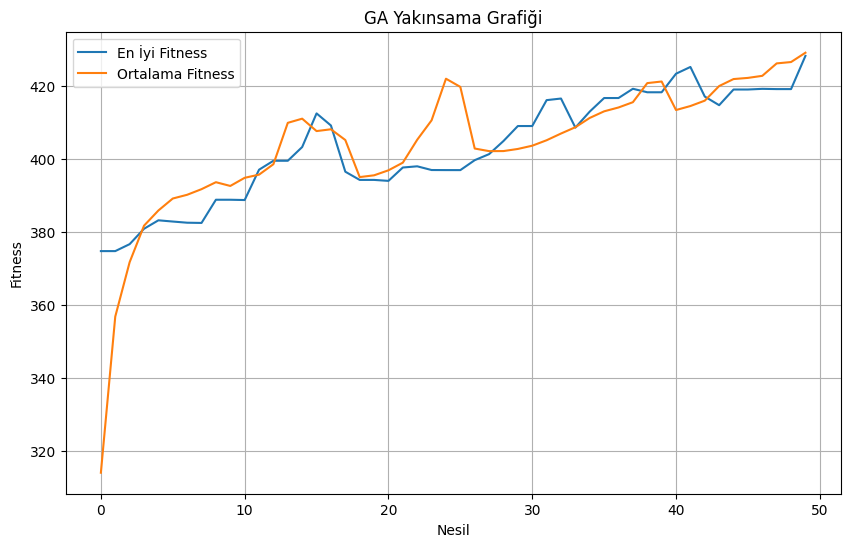

In [548]:
plt.figure(figsize=(10,6))
plt.plot(en_iyi_degerler, label="En İyi Fitness")
plt.plot(ortalama_degerler, label="Ortalama Fitness")
plt.xlabel("Nesil")
plt.ylabel("Fitness")
plt.title("GA Yakınsama Grafiği")
plt.grid(True)
plt.legend()
plt.show()





In [549]:
print("Nesil boyunca en iyi fitness değerleri:")
for i, v in enumerate(en_iyi_degerler):
    print(f"Nesil {i+1}: {v:.2f}")


Nesil boyunca en iyi fitness değerleri:
Nesil 1: 374.71
Nesil 2: 374.71
Nesil 3: 376.61
Nesil 4: 380.82
Nesil 5: 383.14
Nesil 6: 382.80
Nesil 7: 382.48
Nesil 8: 382.42
Nesil 9: 388.76
Nesil 10: 388.76
Nesil 11: 388.68
Nesil 12: 396.98
Nesil 13: 399.43
Nesil 14: 399.43
Nesil 15: 403.19
Nesil 16: 412.39
Nesil 17: 409.08
Nesil 18: 396.44
Nesil 19: 394.19
Nesil 20: 394.19
Nesil 21: 393.92
Nesil 22: 397.58
Nesil 23: 397.91
Nesil 24: 396.90
Nesil 25: 396.88
Nesil 26: 396.87
Nesil 27: 399.59
Nesil 28: 401.25
Nesil 29: 404.83
Nesil 30: 408.93
Nesil 31: 408.93
Nesil 32: 416.02
Nesil 33: 416.45
Nesil 34: 408.50
Nesil 35: 412.89
Nesil 36: 416.59
Nesil 37: 416.59
Nesil 38: 419.13
Nesil 39: 418.17
Nesil 40: 418.17
Nesil 41: 423.24
Nesil 42: 425.10
Nesil 43: 417.00
Nesil 44: 414.63
Nesil 45: 418.92
Nesil 46: 418.92
Nesil 47: 419.11
Nesil 48: 419.04
Nesil 49: 419.04
Nesil 50: 428.12


In [550]:
en_iyi_birey = max(populasyon, key=fitness)

print("En iyi çözüm:")
print(f"Eğim açısı (x1): {en_iyi_birey[0]:.2f}")
print(f"Yön sapması (x2): {en_iyi_birey[1]:.2f}")
print(f"Maksimum enerji verimi: {fitness(en_iyi_birey):.2f}")


En iyi çözüm:
Eğim açısı (x1): 21.05
Yön sapması (x2): 86.53
Maksimum enerji verimi: 428.12


### En İyi Çözümün Evrimi

Grafikte görüldüğü üzere, genetik algoritma her nesilde
daha yüksek uygunluk değerlerine ulaşmıştır.
Son nesilde elde edilen en iyi bireyin x₁ ve x₂ değerleri
yukarıda yazdırılmıştır.

Bu sonuçlar, algoritmanın yakınsadığını ve
maksimum enerji verimine ulaştığını göstermektedir.


### Sonuçların Yorumu

Genetik algoritma, turnuva seçimi sayesinde
her nesilde daha iyi çözümlere ulaşmıştır.
Grafik, algoritmanın belirli bir noktadan sonra
yakınsadığını göstermektedir.